# Exploratory Data Analysis

### Loading Dataset

In [1]:
import pandas as pd

#loading the GTD 
file_path = '/Users/klaaskorteweg/Desktop/Master Thesis/globalterrorismdb_0522dist.xlsx'

df = pd.read_excel(file_path)

### Understanding Dataset

In [2]:
#shape of the df
print('Variables:',df.shape[1])
print('Instances:',df.shape[0])

df.head()

Variables: 135
Instances: 209706


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
#all variables
print(df.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [4]:
#meaningfull analysis
#basically, checked with information in the codebook of variables what variables can be interesting for this study: 

variables_yes = ["iyear", "imonth", "iday", "country_txt", "region_txt", "provstate", "city",
    "attacktype1_txt", "targtype1_txt", "gname", "gsubname", "weaptype1_txt", "weapsubtype1_txt"] 

variables_maybe = ["crit1", "crit2", "crit3", "multiple", "suicide", "individual",
    "nperps", "weaptype2_txt", "weapsubtype2_txt", "weaptype3_txt", "weapsubtype3_txt", "weaptype4_txt", "weapsubtype4_txt", "INT_LOG",
    "INT_IDEO", "INT_MISC", "INT_ANY"]

In [5]:
#Specific variable information/analysis

def variable_info(dataset,var,val):
    #unique values for certain variable: 
    print('Number of unique values:',dataset[var].nunique())
    print('Unique values:',dataset[var].unique())
    print()
    #missing value count:
    missing_values_count = dataset[var].isnull().sum()
    print("Number of missing values:",missing_values_count)
    print("Percentage of missing values:",(missing_values_count/dataset.shape[0])*100)
    print()
    #count specific value in variable:
    count_value = (dataset[var] == val).sum()
    print("Number of",val,'in',var,':',count_value)
    print("Percentage of",val,'in',var,':',(count_value/dataset.shape[0])*100)

variable = 'targtype1_txt'
value = 'Unknown'
variable_info(df,variable,value)

Number of unique values: 22
Unique values: ['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']

Number of missing values: 0
Percentage of missing values: 0.0

Number of Unknown in targtype1_txt : 7174
Percentage of Unknown in targtype1_txt : 3.4209798479776445


In [6]:
#Unique values and Missing Values

def missing_values_table(dataset):
    missing_df = pd.DataFrame(columns=['variable','unique_values','%_nan','%_Unknown','%_0','%_-9','%_total'])
    vars = dataset.columns.tolist()
    for var in vars:
        perc_total = 0

        #unique_values 
        unique_values = dataset[var].nunique()

        #%_nan
        missing_values_count = dataset[var].isnull().sum()
        missing_values_perc = ((missing_values_count/dataset.shape[0])*100)
        perc_total += missing_values_perc

        #%_Unknown
        count_unknown = (dataset[var] == 'Unknown').sum()
        perc_unknown = ((count_unknown/dataset.shape[0])*100)
        perc_total += perc_unknown
        
        #%_0 (in some categories 0 counts as missing, like imonth, iday)
        count_0 = (dataset[var] == 0).sum()
        perc_0 = ((count_0/dataset.shape[0])*100)
        perc_total += perc_0

        #_-9 (in some categories -9 counts as missing, mostly in binary variables)
        count_min9 = (dataset[var] == -9).sum()
        perc_min9 = ((count_min9/dataset.shape[0])*100)
        perc_total += perc_min9


        missing_df.loc[len(missing_df)] = {'variable':var,'unique_values':unique_values,'%_nan':round(missing_values_perc,2),'%_Unknown':round(perc_unknown,2),'%_0':round(perc_0,2),'%_-9':round(perc_min9,2),'%_total':round(perc_total,2)}
    return missing_df

missing_values_table(df)

,variable,unique_values,%_nan,%_Unknown,%_0,%_-9,%_total
0,eventid,209706,0.00,0.0,0.00,0.00,0.00
1,iyear,50,0.00,0.0,0.00,0.00,0.00
2,imonth,13,0.00,0.0,0.01,0.00,0.01
3,iday,32,0.00,0.0,0.42,0.00,0.42
4,approxdate,3305,93.95,0.0,0.00,0.00,93.95
...,...,...,...,...,...,...,...
130,INT_LOG,3,0.00,0.0,46.38,49.61,95.98
131,INT_IDEO,3,0.00,0.0,37.25,49.67,86.92
132,INT_MISC,3,0.00,0.0,88.99,0.23,89.23
133,INT_ANY,3,0.00,0.0,34.38,45.07,79.45


In [42]:
def value_counts(data,var):
    counts = data[var].value_counts()
    return counts

value_counts(df,'targtype1_txt')


targtype1_txt
Private Citizens & Property       51985
Military                          34131
Police                            28568
Government (General)              23828
Business                          22169
Unknown                            7174
Transportation                     7173
Utilities                          6328
Religious Figures/Institutions     5107
Educational Institution            4761
Government (Diplomatic)            3802
Terrorists/Non-State Militia       3775
Journalists & Media                3313
Violent Political Party            2079
Airports & Aircraft                1428
Telecommunication                  1275
NGO                                1128
Tourists                            460
Maritime                            406
Food or Water Supply                352
Abortion Related                    267
Other                               197
Name: count, dtype: int64

### Visualizations

#### Barplots

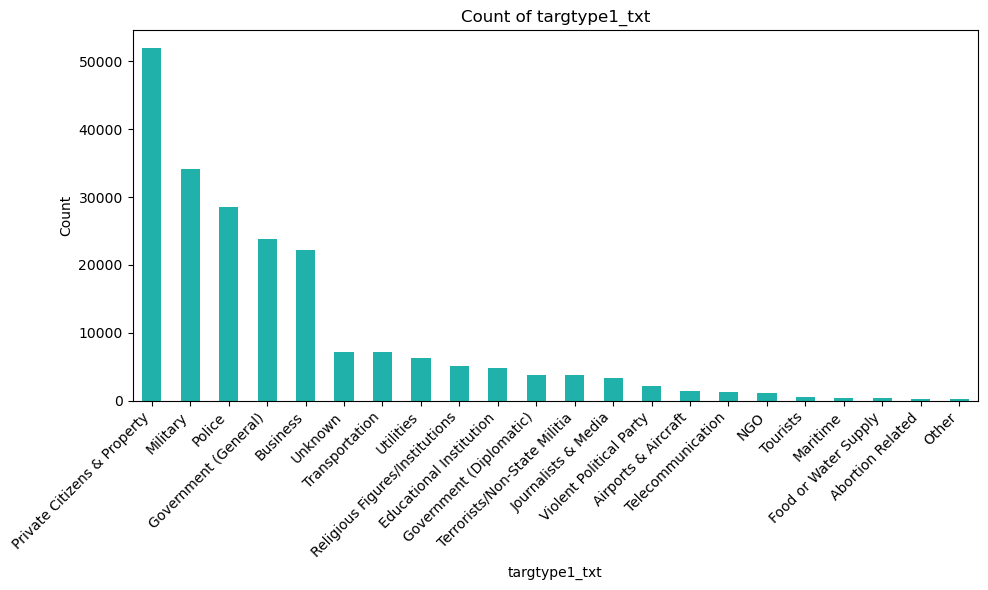

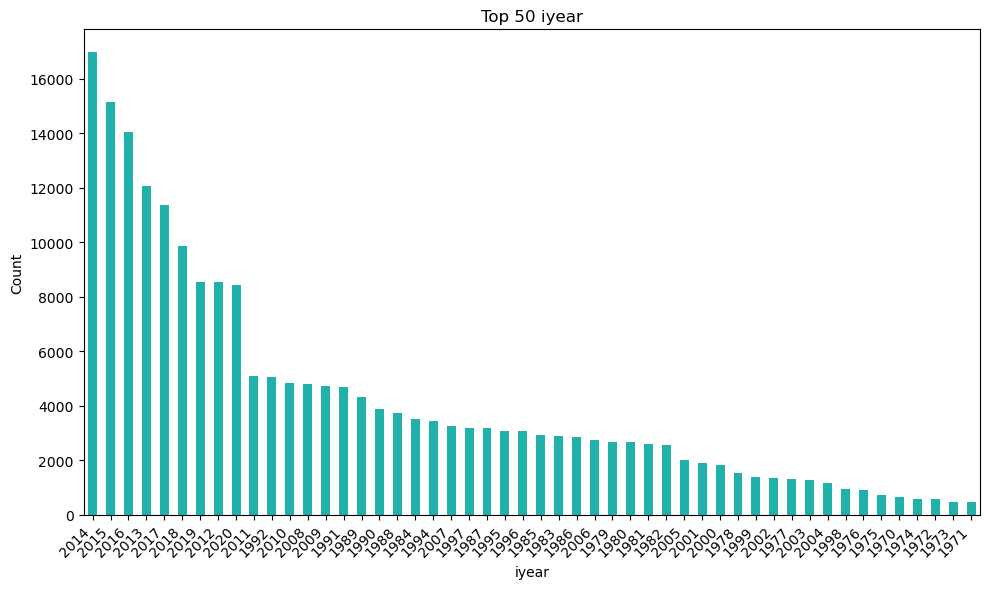

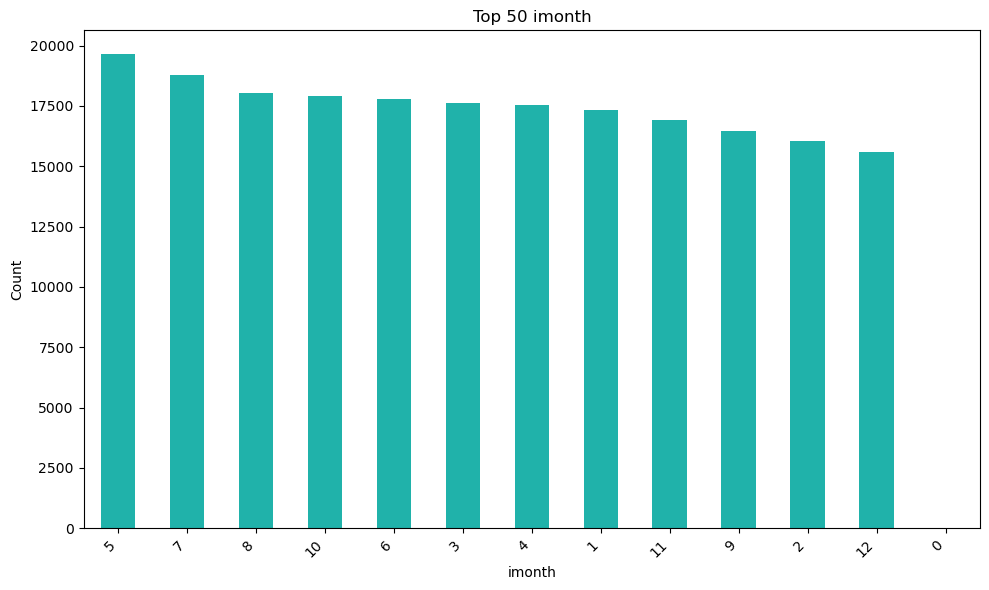

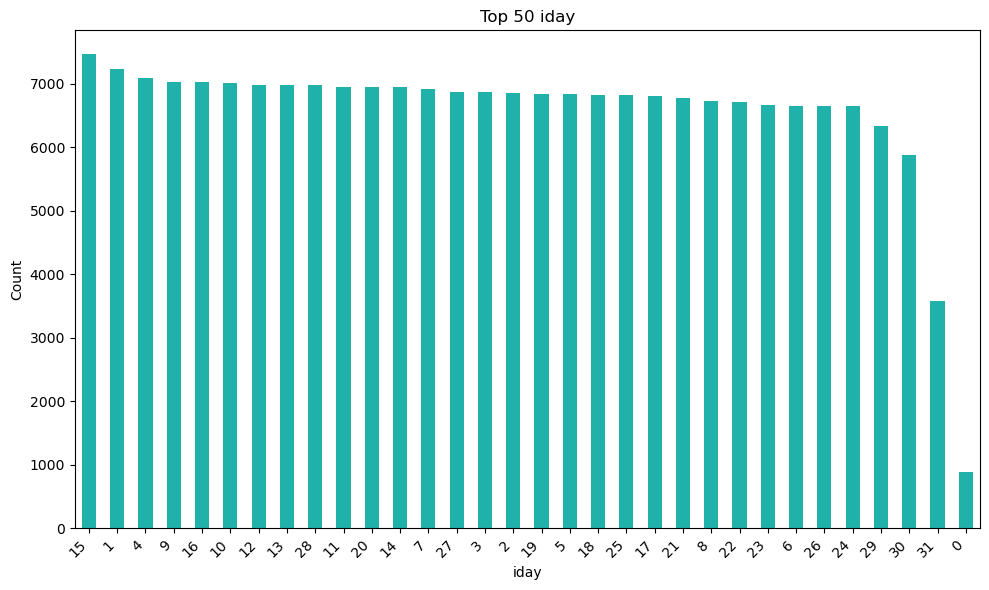

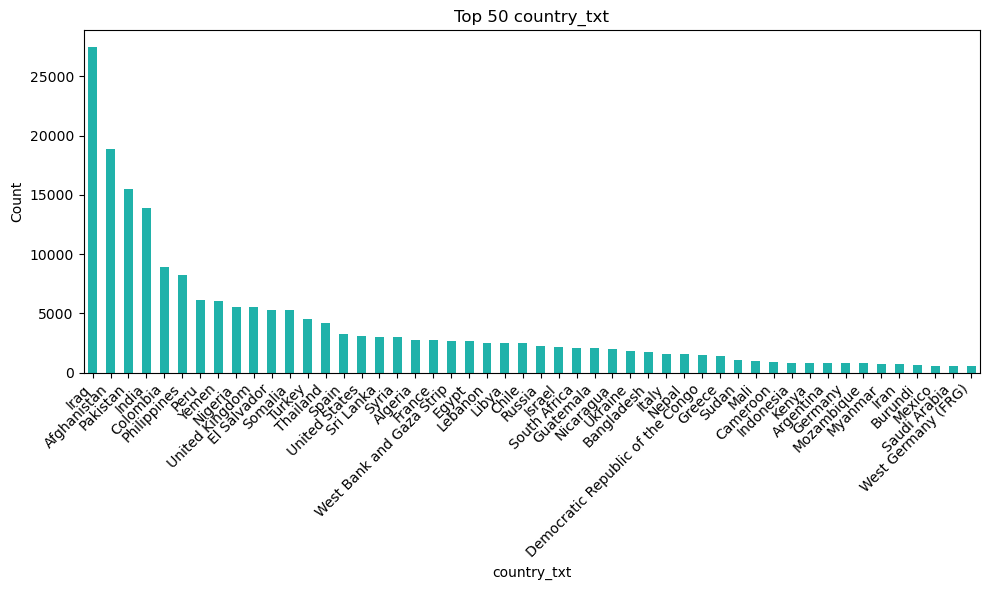

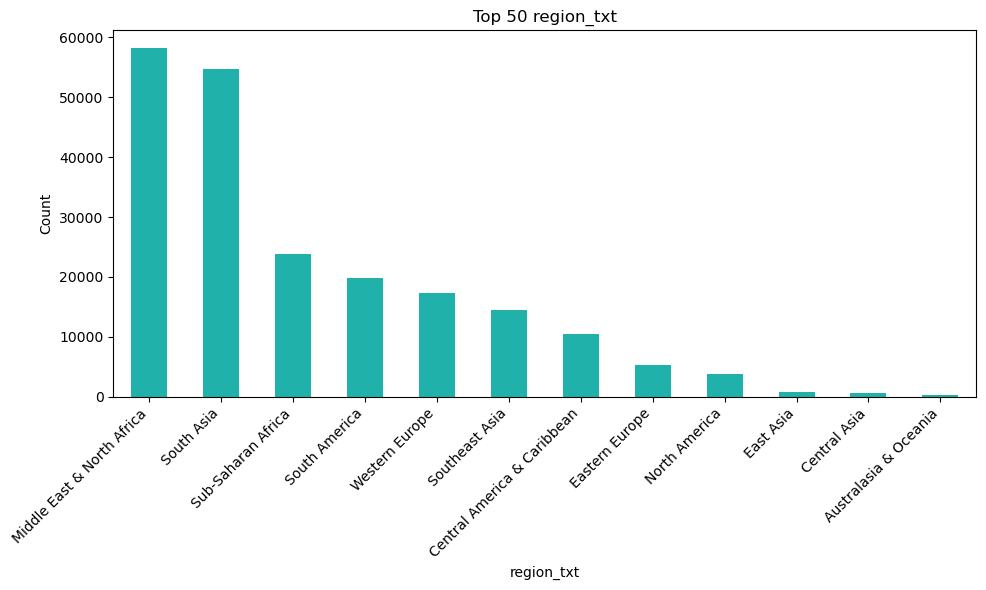

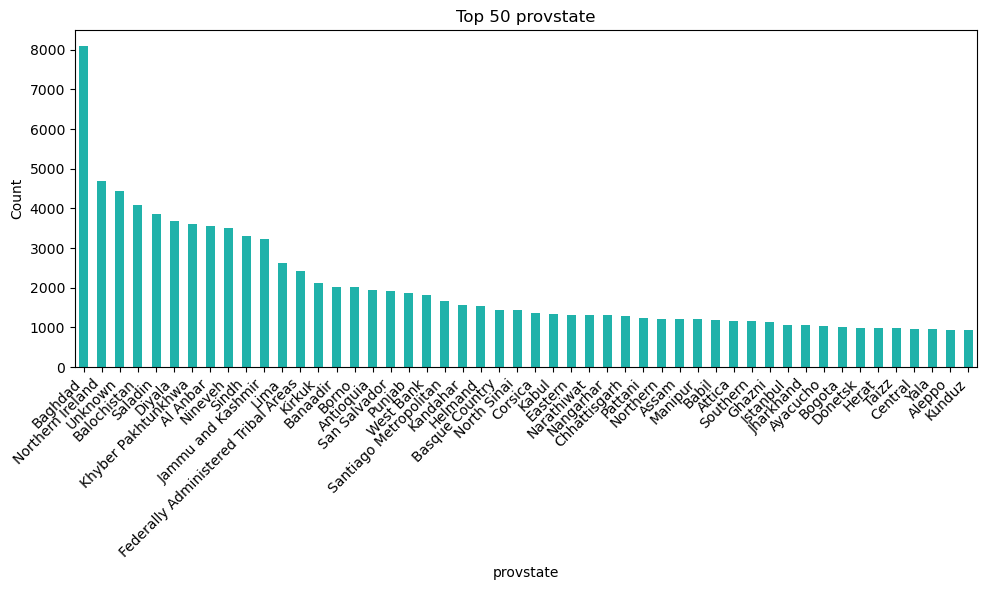

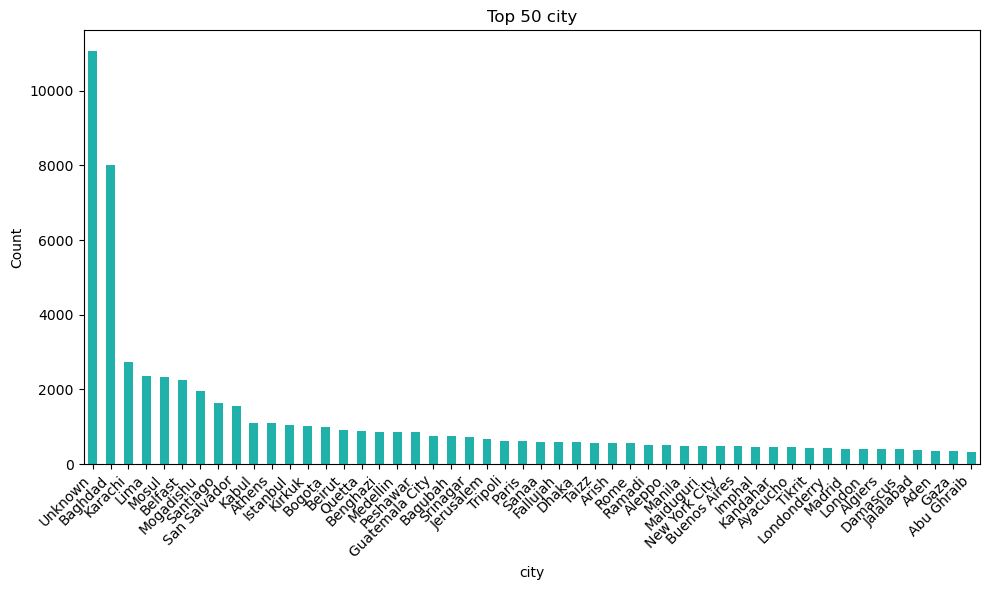

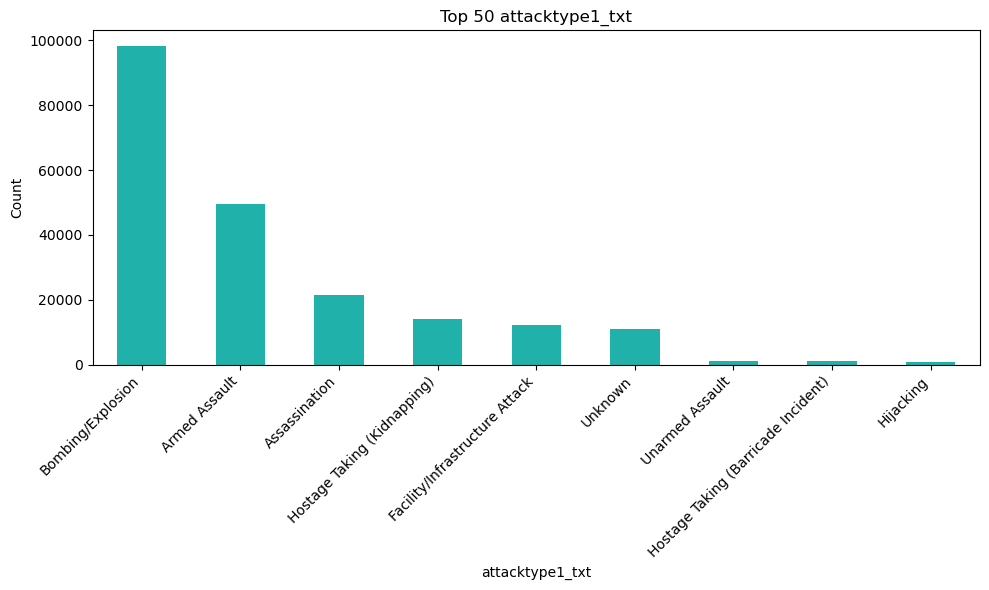

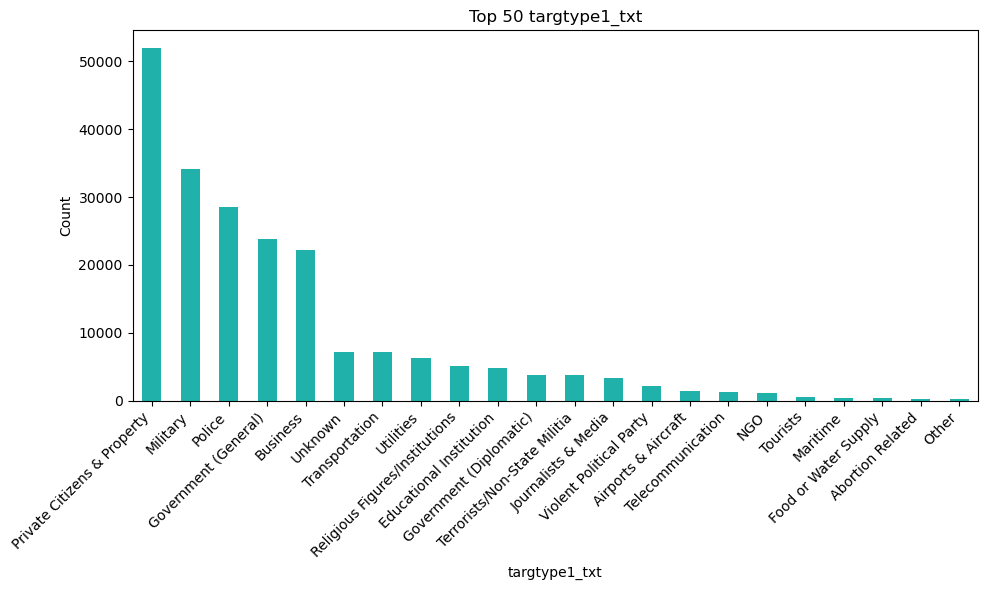

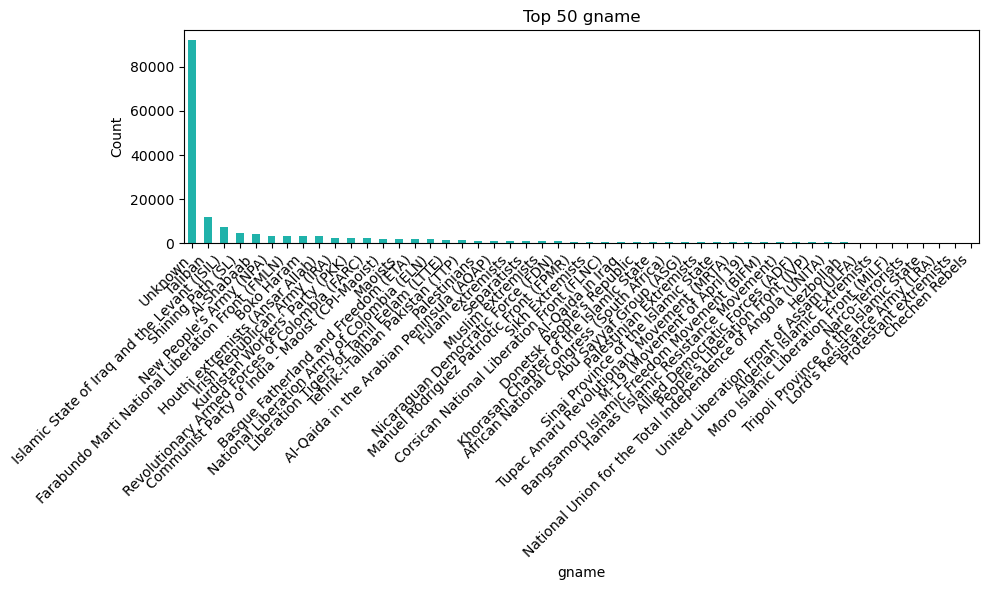

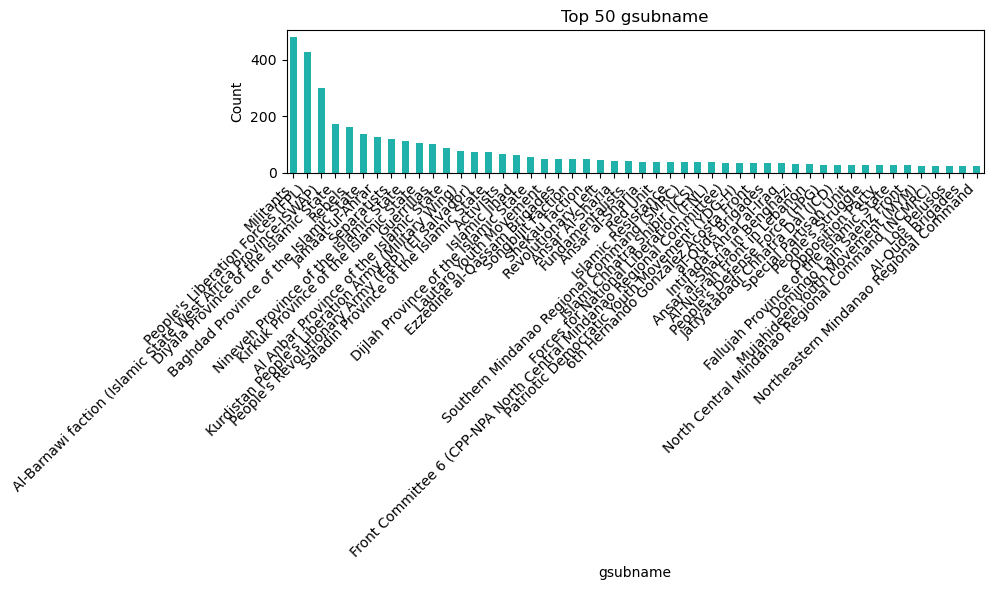

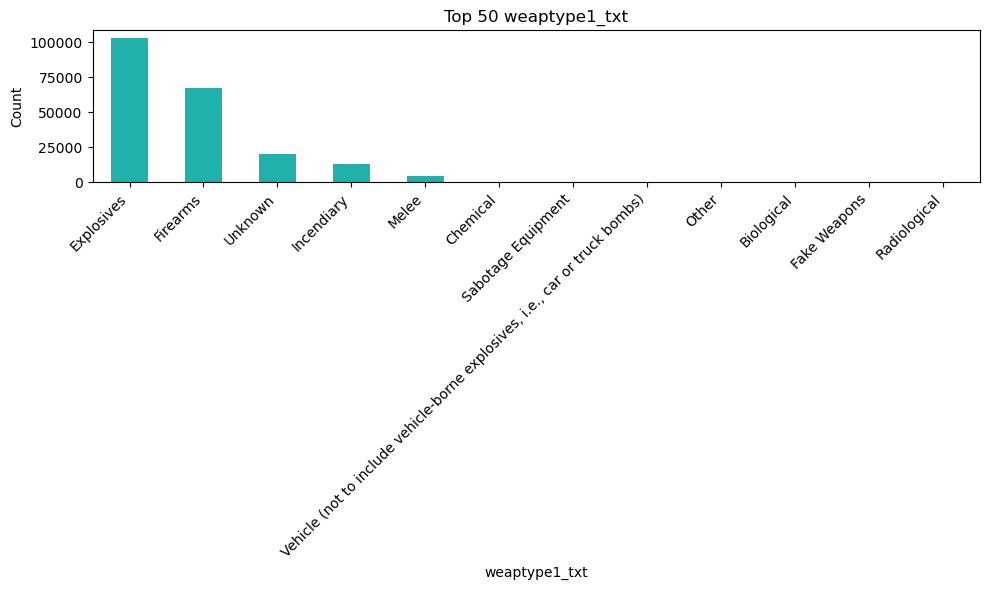

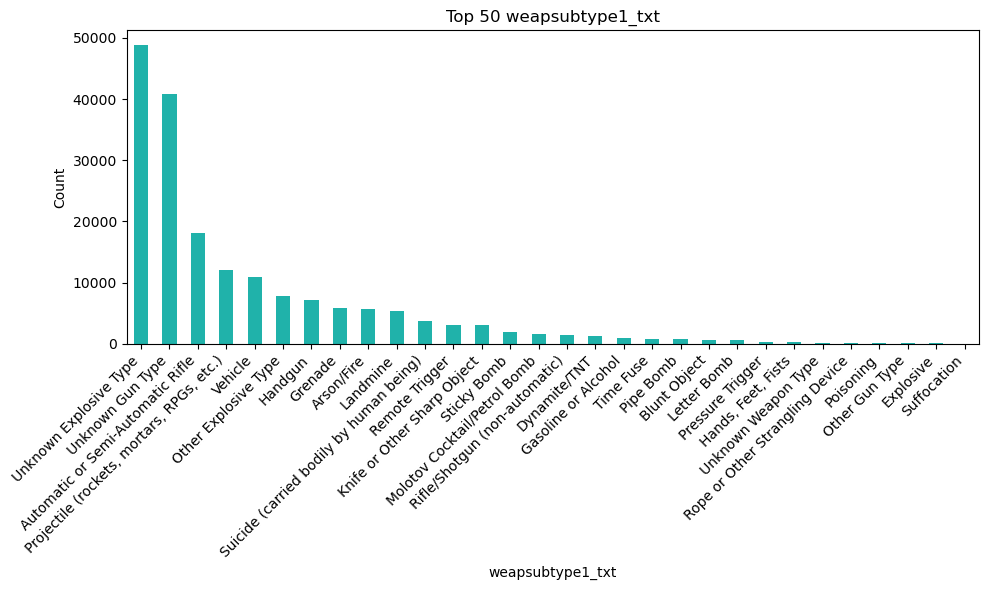

In [7]:
import matplotlib.pyplot as plt

#FREQUENCY DISTRIBUTION: BARPLOT
#barplot with built in function to request the top n in a variable:

def barplot(dataset,var,color='lightseagreen', top_n = None):

    variable_count = dataset[var].value_counts()

    if top_n is not None: 
        variable_count = variable_count.head(top_n)

    plt.figure(figsize=(10, 6))
    variable_count.plot(kind='bar', color=color)
    plt.title(f'{"Top " + str(top_n) if top_n is not None else "Count of"} {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

variable = 'targtype1_txt'
barplot(df,variable)

for i in variables_yes:
    barplot(df,i, top_n = 50)

#### Grouped Barplot

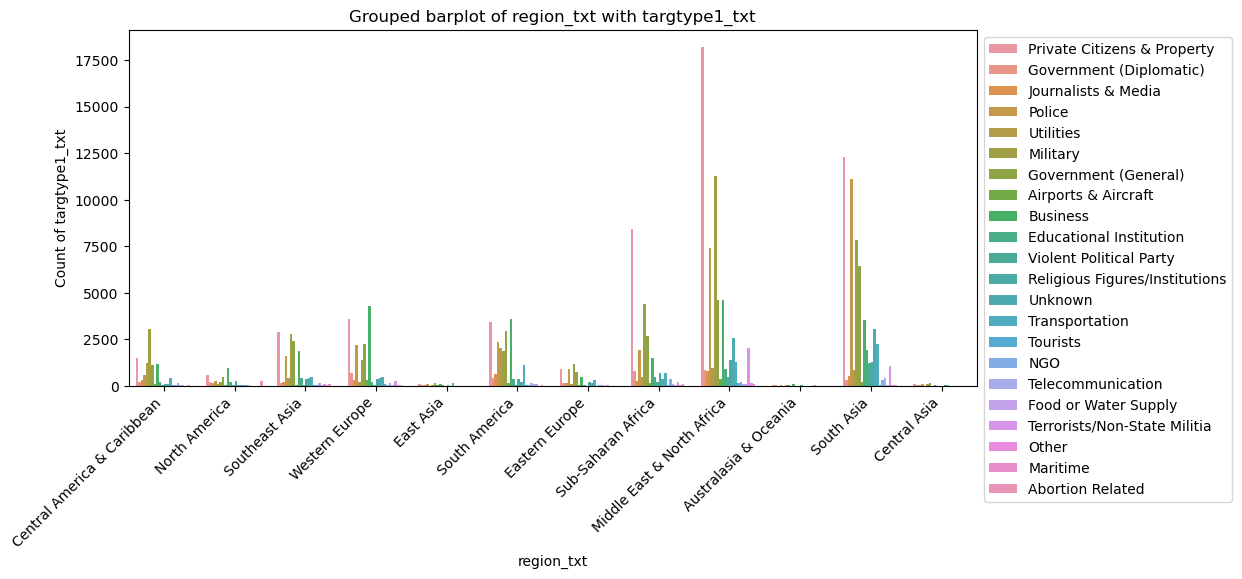

In [8]:
#FREQUENCY DISTRIBUTION: GROUPED BARPLOT

import seaborn as sns
import matplotlib.pyplot as plt

def combined_barplot(dataset,var1,var2):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataset, x=var1, hue=var2)
    plt.title(f'Grouped barplot of {var1} with {var2}')
    plt.xlabel(var1)
    plt.ylabel('Count of ' + var2)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

variable1 = 'region_txt'
variable2 = 'targtype1_txt'
combined_barplot(df,variable1,variable2)

#### Stacked Barplot

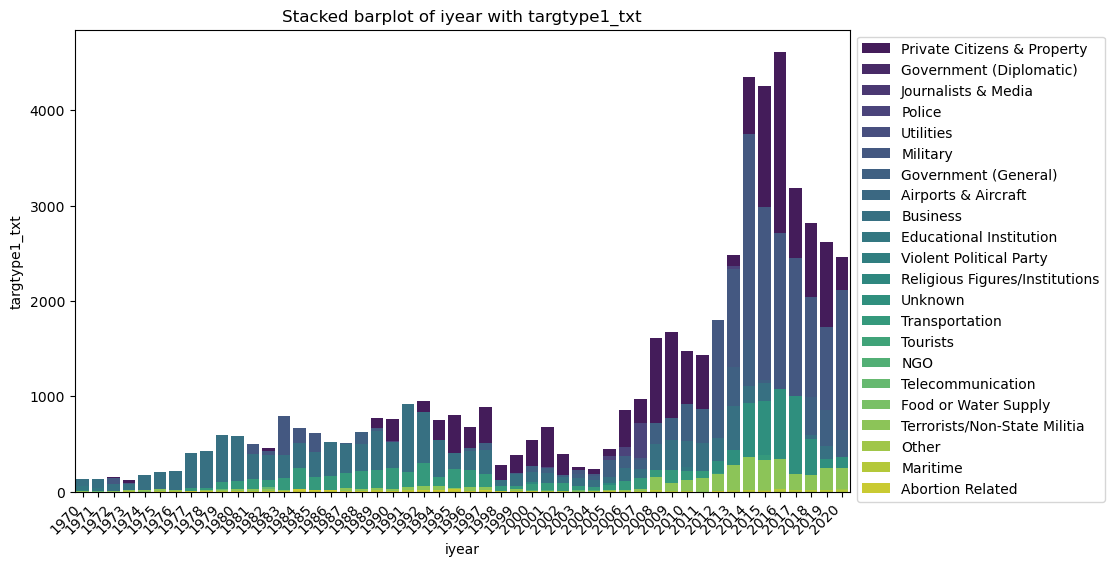

In [9]:
#FREQUENCY DISTRIBUTION: STACKED BARPLOT 

def stacked_barplot(dataset,var1,var2):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataset, x=var1, hue=var2, palette='viridis', dodge=False)
    plt.title(f'Stacked barplot of {var1} with {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.xticks(rotation=45, ha = 'right')
    plt.legend(title='Target Variable')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

variable1 = 'iyear'
variable2 = 'targtype1_txt'
stacked_barplot(df,variable1,variable2)

#### Cross Tabulation Heatmaps

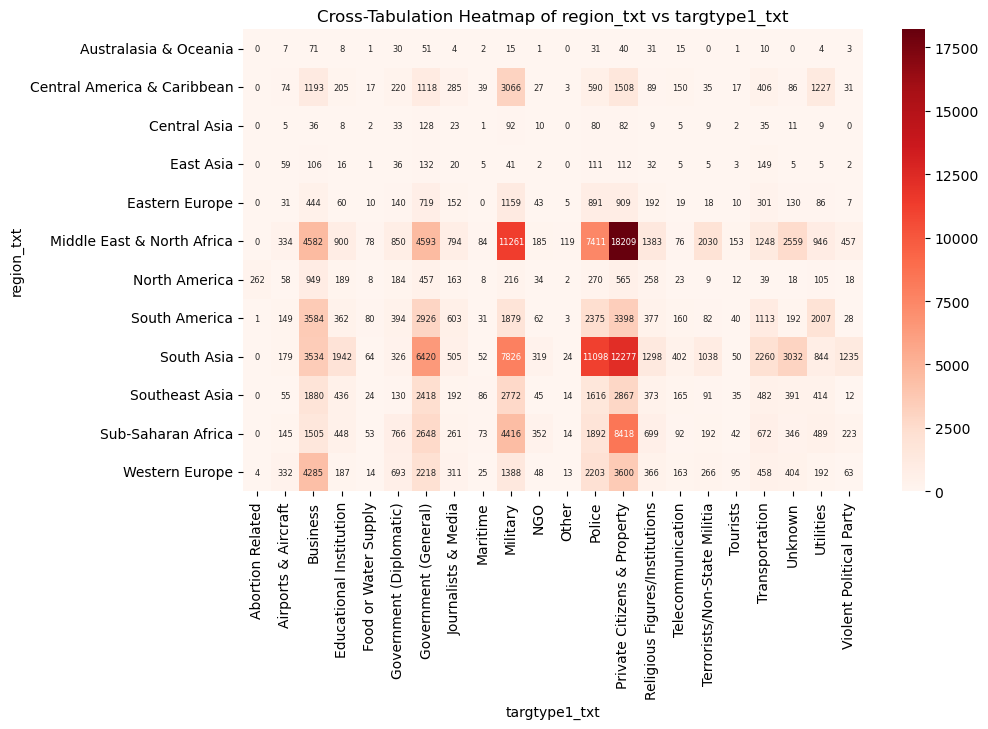

In [10]:
#CROSS-TABULATION: HEATMAP 

def cross_tab_heatmap(dataset, var1, var2):
    cross_tab = pd.crosstab(dataset[var1],dataset[var2])

    plt.figure(figsize=(10,6))
    sns.heatmap(cross_tab, annot=True, fmt = 'd', cmap = 'Reds', annot_kws={"size":6})
    plt.title(f'Cross-Tabulation Heatmap of {var1} vs {var2}')
    plt.xlabel(var2)
    plt.ylabel(var1)


    plt.show()

variable1 = 'region_txt'
variable2 = 'targtype1_txt'
cross_tab_heatmap(df,variable1,variable2)

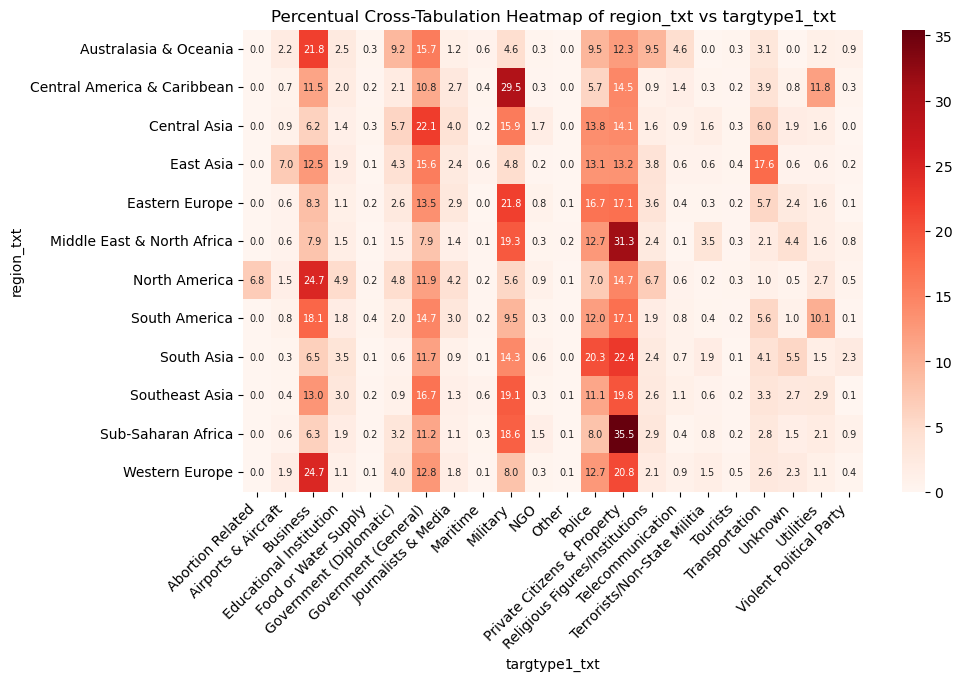

In [56]:
#PERCENTUAL CROSS-TABULATION HEATMAP

def percent_cross_tab_heatmap(dataset, var1, var2, normalize = 'index'):
    cross_tab = pd.crosstab(dataset[var1],dataset[var2],normalize=normalize)*100
    plt.figure(figsize=(10,6))
    sns.heatmap(cross_tab,annot=True, fmt='.1f',cmap='Reds',annot_kws={"size":7})
    plt.title(f'Percentual Cross-Tabulation Heatmap of {var1} vs {var2}')
    plt.xlabel(var2)
    plt.ylabel(var1)
    plt.xticks(rotation=45, ha = 'right')
    plt.show()

variable1 = 'region_txt'
variable2 = 'targtype1_txt'
percent_cross_tab_heatmap(df,variable1,variable2)

### Association

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


def cramers_v(data,var1,var2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    V = np.sqrt(chi2 / (n * min_dim))
    return V

def contingency_coefficient(data,var1,var2):
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    C = np.sqrt(chi2 / (chi2 + n))
    return C

variable1 = 'targtype1_txt'
variable2 = 'region_txt'

print("Cramer's V:",cramers_v(df,variable1,variable2))
print('Contingency Coefficient:',contingency_coefficient(df,variable1,variable2))



Cramer's V: 0.1506462670935803
Contingency Coefficient: 0.44695390036706883


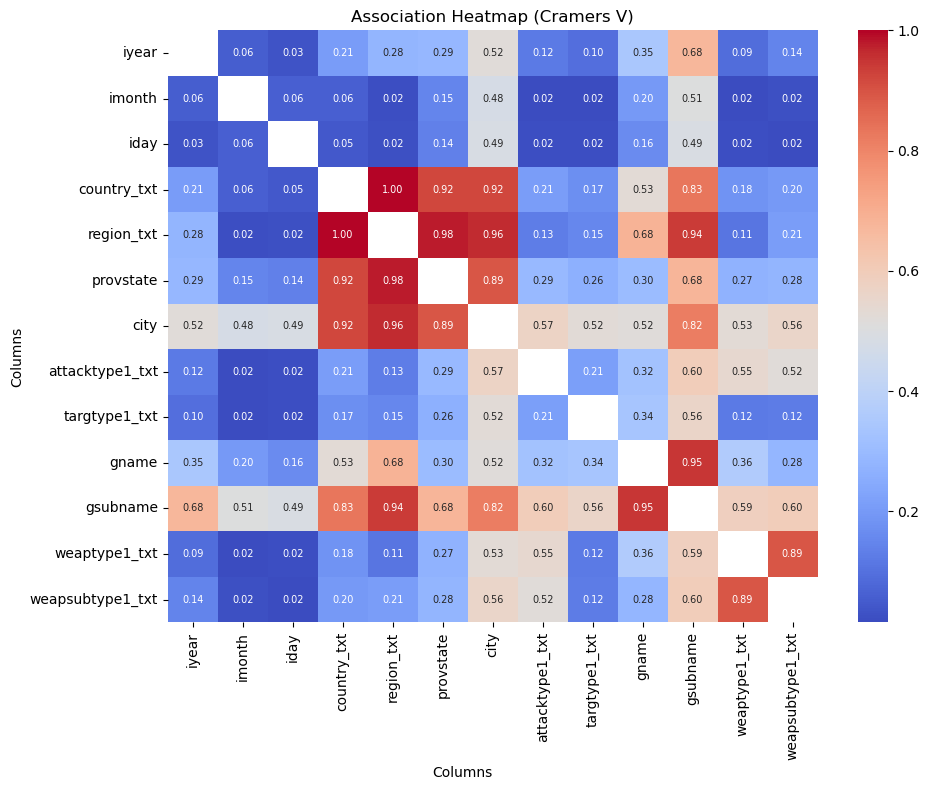

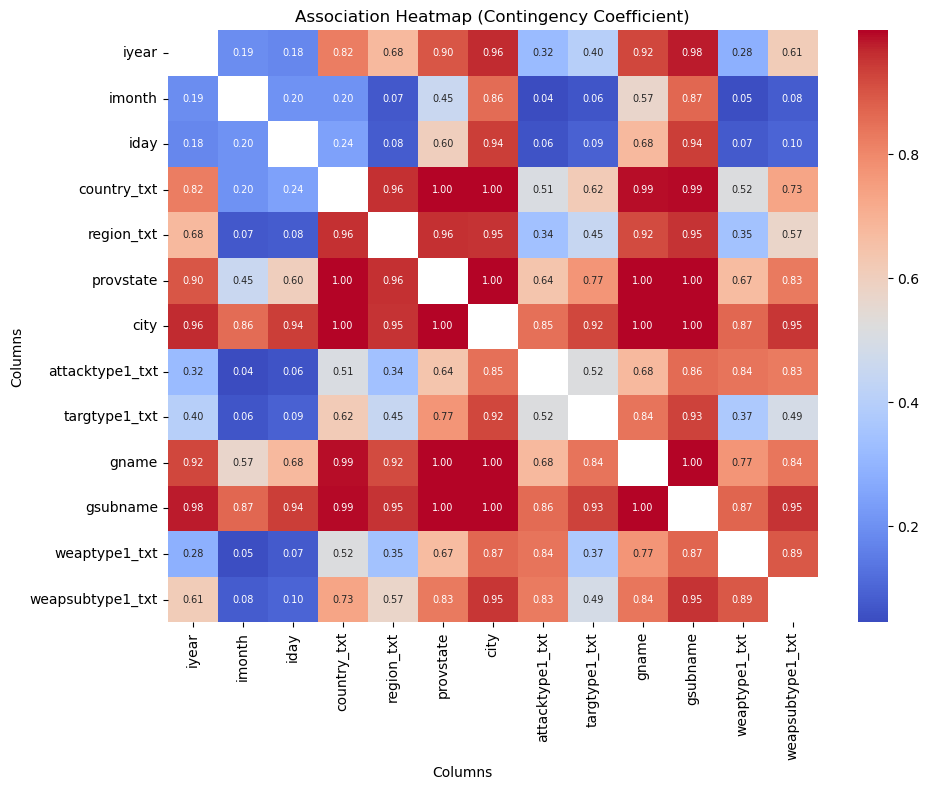

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


def association_heatmap(data, method = 'cramers_v', vars = None):
    if vars is None:
        vars = data.columns[data.dtypes == 'object']
    contingency_df = pd.DataFrame(index=vars, columns = vars)
    for column1 in vars:
        for column2 in vars:
            if column1 != column2:
                if method == 'cramers_v':
                    coeff = cramers_v(data, column1, column2)
                elif method == 'contingency_coefficient':
                    coeff = contingency_coefficient(data,column1,column2)
                else:
                    raise ValueError("Invalid method. Choose 'cramers_v or 'contingency_coefficient'.")
                contingency_df.loc[column1, column2] = coeff
    contingency_df = contingency_df.apply(pd.to_numeric)
    plt.figure(figsize=(10,8))
    sns.heatmap(contingency_df, annot=True, cmap = "coolwarm", fmt = ".2f", annot_kws={"fontsize": 7})
    plt.title(f"Association Heatmap ({method.replace('_', ' ').title()})")
    plt.xlabel("Columns", ha = 'right')
    plt.ylabel("Columns", ha = 'right')
    plt.tight_layout()
    plt.show()
    
association_heatmap(df, method='cramers_v',vars = variables_yes)
association_heatmap(df, method='contingency_coefficient',vars = variables_yes)


/var/folders/lk/cbymg43d1pd25kqfdyckdc4h0000gn/T/ipykernel_64575/1560027168.py:11: RuntimeWarning: invalid value encountered in divide
  V = np.sqrt(chi2 / (n * min_dim))
/var/folders/lk/cbymg43d1pd25kqfdyckdc4h0000gn/T/ipykernel_64575/1560027168.py:11: RuntimeWarning: invalid value encountered in divide
  V = np.sqrt(chi2 / (n * min_dim))
/var/folders/lk/cbymg43d1pd25kqfdyckdc4h0000gn/T/ipykernel_64575/1560027168.py:11: RuntimeWarning: invalid value encountered in divide
  V = np.sqrt(chi2 / (n * min_dim))
/var/folders/lk/cbymg43d1pd25kqfdyckdc4h0000gn/T/ipykernel_64575/1560027168.py:11: RuntimeWarning: invalid value encountered in divide
  V = np.sqrt(chi2 / (n * min_dim))
/var/folders/lk/cbymg43d1pd25kqfdyckdc4h0000gn/T/ipykernel_64575/1560027168.py:11: RuntimeWarning: invalid value encountered in divide
  V = np.sqrt(chi2 / (n * min_dim))
/var/folders/lk/cbymg43d1pd25kqfdyckdc4h0000gn/T/ipykernel_64575/1560027168.py:11: RuntimeWarning: invalid value encountered in divide
  V = np.s

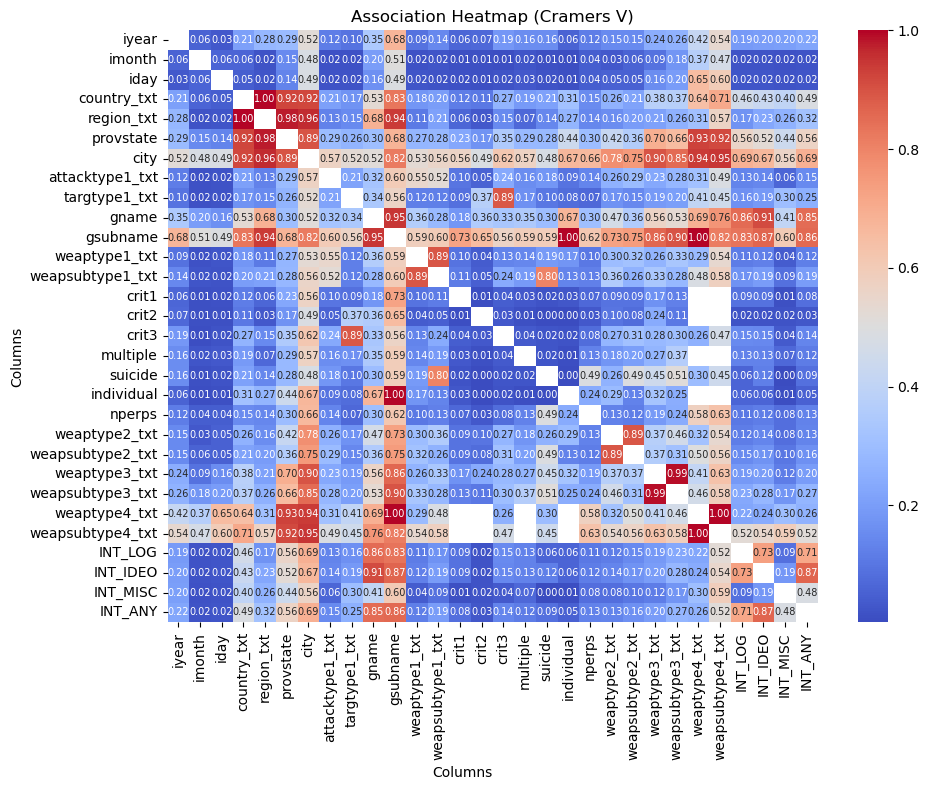

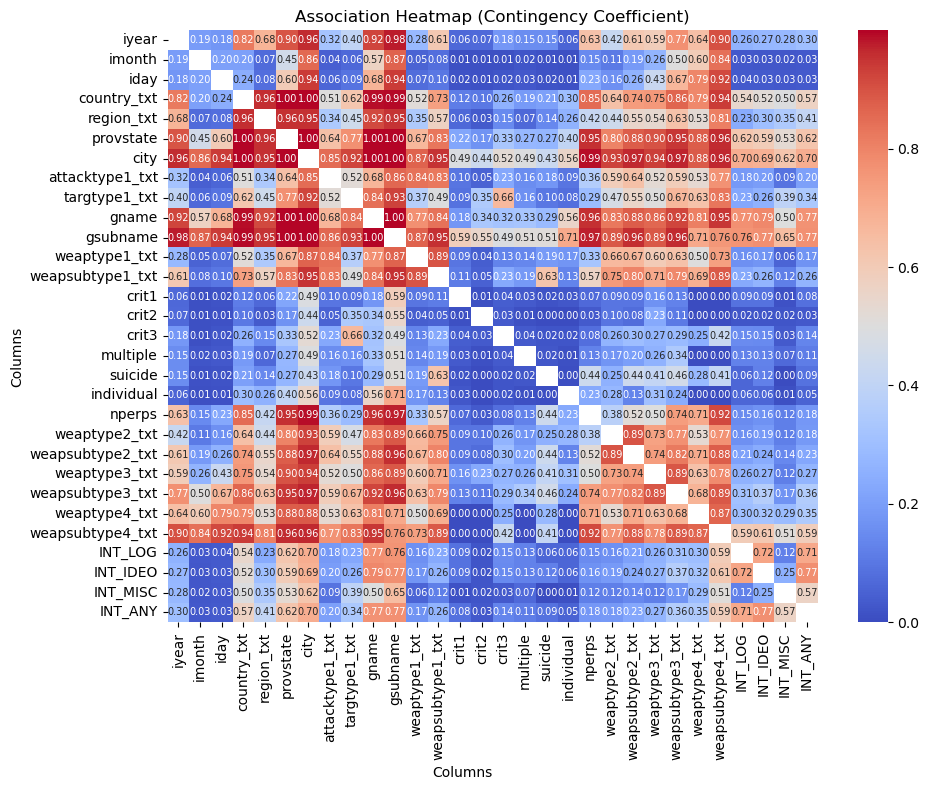

In [30]:
association_heatmap(df, method='cramers_v',vars = (variables_yes+variables_maybe))
association_heatmap(df, method='contingency_coefficient',vars = (variables_yes+variables_maybe))